<a href="https://colab.research.google.com/github/Joaofelipeperes/Sistemas-Inteligentes-de-Apoio-a-Decisao/blob/main/Semin%C3%A1rio_Grupo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Aprendizado não supervisionado**

# 1. Introdução

*   Procura por padrões.
*   Dados não rotulados.
*   Modelo trabalha por conta própria.











---
# 2. Objetivo
<p align="justify">
O objetivo deste trabalho é aplicar técnicas de aprendizado não supervisionado para analisar e agrupar dados de avaliações de filmes e dados socioeconômicos de países, utilizando os algoritmos K-means e DBSCAN. No contexto das avaliações de filmes, aplicaremos o K-means para agrupar as avaliações com base na polaridade dos sentimentos expressos, utilizando dados da Stanford Sentiment Treebank e a biblioteca TextBlob para análise de sentimentos. Além disso, utilizaremos o DBSCAN para identificar e categorizar países com base em fatores como renda, PIB, investimento em saúde e expectativa de vida, destacando aqueles que mais necessitam de apoio socioeconômico. Tendo como motivação demonstrar a eficácia desses algoritmos na identificação de padrões ocultos e na categorização de grandes conjuntos de dados, fornecendo insights importantes sem a necessidade de rótulos pré-definidos.
</p>


















---

# 3. Dataset Avaliação de filmes



*   https://ai.stanford.edu/~amaas/data/sentiment/
*   50.000 Dados



In [ ]:
import urllib.request

url = 'https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'
output_path = 'arquivo.tar'

urllib.request.urlretrieve(url, output_path)
print("Database baixado")

Database baixado


In [ ]:
#manipulação de arquivos tar
import tarfile

tar_path = 'arquivo.tar'

with tarfile.open(tar_path, 'r') as tar:
    tar.extractall('extracted_files')
print("Extração completa")

extracted_path = 'extracted_files'

Extração completa


In [ ]:
#codigo para avaliar uma frase
def Avaliar(texto):
    blob = TextBlob(texto)

    polaridade = blob.sentiment.polarity

    if polaridade > 0:
        return polaridade
    elif polaridade < 0:
        return polaridade
    else:
        return polaridade

In [ ]:
#interação com o sistema operacional, manipular arquivos
from textblob import TextBlob

import os

folder_path = 'extracted_files/aclImdb/train/unsup'

texts = []

# Listar arquivos
file_list = os.listdir(folder_path)

#Avaliar cada frase.
for file_name in file_list:
    if file_name.endswith('.txt'):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()
            texts.append((file_name, content, Avaliar(content)))


# Impressão dos dados
print(f"Concluido")

Concluido


In [ ]:
#processamento de linguagem natural. google já instalado.
!pip install textblob

In [ ]:
#avaliar se a frase é positiva ou negativa.
from textblob import TextBlob

def determinar_sentimento(texto):
    blob = TextBlob(texto)

    polaridade = blob.sentiment.polarity

    if polaridade > 0:
        return "Positivo", polaridade
    elif polaridade < 0:
        return "Negativo", polaridade
    else:
        return "Neutro", polaridade

texto = input("Digite uma frase para análise de sentimento: ") #Inglês
resultado, polaridade = determinar_sentimento(texto)
print(f"O sentimento da frase é: {resultado} (Polaridade : {polaridade})") #varia de 1 a -1

Digite uma frase para análise de sentimento: Watched this with some trepidation, having seen the absolutely excellent trailer. So few movies live up to their trailers, especially indies. Anxiety increased by having read Buscemi's fairly harrowing account of making the film in one of those 'The Directors' books.<br /><br />Shouldn't have worried. Great flick. Totally engrossing, especially to a *cough* former *cough* barfly like myself. Beautifully understated, funny, very sad, nicely paced and Buscemi very wisely NOT trying to dominate every scene, although he certainly dominates the movie.<br /><br />Movie appears on first sight plot less but actually it isn't at all: Buscemi's search for a second chance to escape from the morass of his own making is riveting. Everyone involved seems to have had a good time and the beautifully relaxed performances are the reward. Only the two knucklehead goombahs fall below the otherwise uniformly excellent level.<br /><br />A real treat, and thorough

In [ ]:
for file_name, text, polaridade in texts:
      print(f"Conteúdo do arquivo {file_name}:\n{text}\nPolaridade:{polaridade}\n")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Conteúdo do arquivo 49251_0.txt:
I watched this movie because I'm a fan of Ethan Hawke. Sad to say, there was little good about it. Frank Whaley always looked strained trying to get his part right, while Ethan appeared relaxed and natural. That's the difference between a want-a-be and an outstanding actor. The high light of the movie was when Ethan Hawke, playing an inept grocery store stocking clerk, kept dumping his load of boxes off the dolly. The part played by Whaley was of a loser want-a-be stand-up comic who could not make the grade and was never funny. The pathetic Whaley character was a thief (stole from his employer), drunk (what he stole was beer), argumentative individual (couldn't hold a job), and general misfit. As to the movie itself, it was a drag, repetitive in its plot with only the local changing. In other words, the plot was recycled every few minutes. In general slow and predictable, a bore to watch, and if you haven't seen it yet, don't waste your time.
Polaridad

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


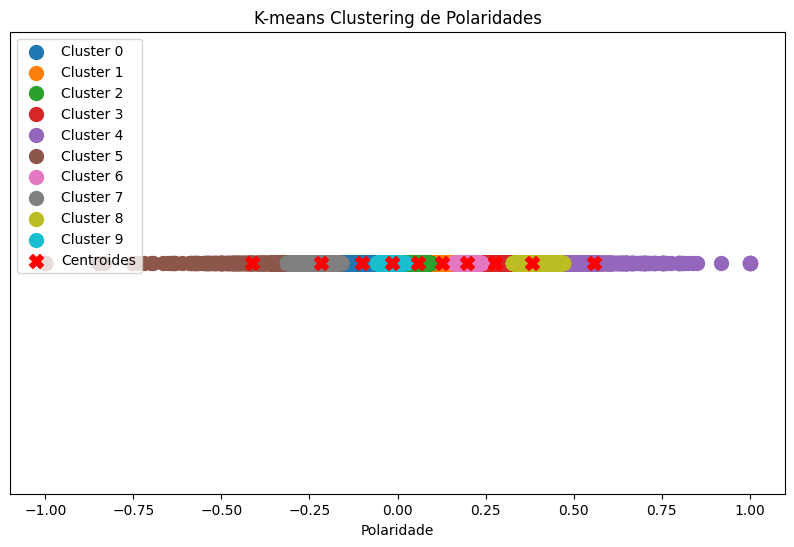

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

listaNomeArquivo = []
listaTexto= []
listaPolaridades = []

for file_name, text, polaridade in texts:
  listaNomeArquivo.append(file_name)
  listaTexto.append(text)
  listaPolaridades.append(polaridade)

X = np.array(listaPolaridades).reshape(-1, 1) #Estamos preparando os dados para as funções do Kmeans

num_clusters = 10  #É possível mudar o número de clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X)
labels = kmeans.labels_

#Representação gráfica
plt.figure(figsize=(10, 6))

for cluster in range(num_clusters):
    cluster_points = X[labels == cluster]
    plt.scatter(cluster_points, [0] * len(cluster_points), label=f'Cluster {cluster}', s=100)

#Marcar os Centroides no mapa
centroids = kmeans.cluster_centers_
plt.scatter(centroids, [0] * len(centroids), s=100, c='red', marker='X', label='Centroides')

plt.title('K-means Clustering de Polaridades')
plt.xlabel('Polaridade')
plt.yticks([])
plt.legend()
plt.show()



---


# 3.1 **Algoritmo K-means**

*   Gera agrupamentos (clusters).
*   Centroide (média dos valores de cada cluster).
*   Agrupamentos dependente de imputs do usuário.
*   Simplicidade, mais utilizado.







---
# 3.2 Resultados
<p align="justify">
Podemos citar que o sentimento geral das frases foi devidamente extraido em parte do conjunto de dados, possibilitando uma classificação simples em três clusters, sendo negativo, positivo e neutro. Entretanto, escalando para o uso adequado, sendo classficação em uma escala de 1 a 10, podemos observar os seguintes pontos que obstruiram o funcionamento ideal do algoritmo: </p>


*   Linguagem Natural.
*   Inconsistências do TextBlob.
*   Clusterização (dados próximos).
*   Ruídos e Inconsistências nos dados.

---
# 3.3 Problemas de Clustering no k-means:
<div style="text-align: justify;">

*   Escolha do número de clusters: O k-Means requer a especificação do número de clusters previamente, o que pode ser difícil de determinar sem um conhecimento prévio dos dados. Caso seja escolhido um valor inadequado para k, os resultados podem ser afetados das seguintes formas:

  A escolha incorreta de k pode influenciar diretamente a interpretação dos resultados do clustering;

  Pode resultar em soluções subótimas.

*   Sensibilidade a Outliers: O algoritmo K-Means é sensível a outliers, podendo distorcer os clusters formados das seguintes formas:

  Distorção dos centróides, por serem calculados como a média dos pontos atribuídos a cada cluster;

  Criação de clusters artificiais;

  Impacto na variância intra-cluster, pois os clusters no k-means são definidos de forma que minimizem a soma dos quadrados das distâncias dos pontos para os seus respectivos centróides.

  Impacto na interpretação dos resultados:

*   Clusters de formas não esféricas: O K-Means assume que os clusters tem uma forma esférica e tamanhos similares.

  O k-means calcula os centróides dos clusters assumindo que os dados em cada cluster estão distribuídos de forma esférica ao redor do centróide. Essa suposição é baseada na distância euclidiana, que mede a distância entre pontos no espaço euclidiano, onde a forma mais simples é uma esfera.
  
  O k-means assume que todos os clusters têm aproximadamente o mesmo número de pontos ou a mesma densidade. Isso é implícito na forma como os centróides são calculados como a média dos pontos atribuídos a cada cluster.
  
  Sendo assim, em conjuntos de dados onde os clusters têm formas não esféricas, como agrupamentos lineares, elípticos ou de outra forma irregular, o k-means pode não ser capaz de modelar adequadamente a estrutura dos dados.
</div>











---
# 3.4 Outros Algoritmos que poderiam ser utilizados


## 3.4.1 Mean Shift (Deslocamento Médio)
<p align="justify"> O algoritmo Mean Shift tenta encontrar modos densos em um espaço de dados e agrupa os pontos ao redor desses modos. É um algoritmo útil quando não há conhecimento antecipado sobre o número de clusters.</p>

<p align="justify"> Assim como o K-Means, o Mean Shift também se baseia em centróides. No entanto, ele encontra automaticamente a quantidade de clusters, sendo assim, não há a necessidade de definir essa quantidade previamente.</p>
  
<p align="justify"> Se baseia em encontrar máximos locais na densidade de pontos para descobrir os centros dos clusters. Atualiza os candidatos a centróides para serem a média dos pontos em uma determinada região. Os candidatos então são filtrados para eliminar pontos duplicados ou muito próximos, formando um conjunto final de centróides.</p>

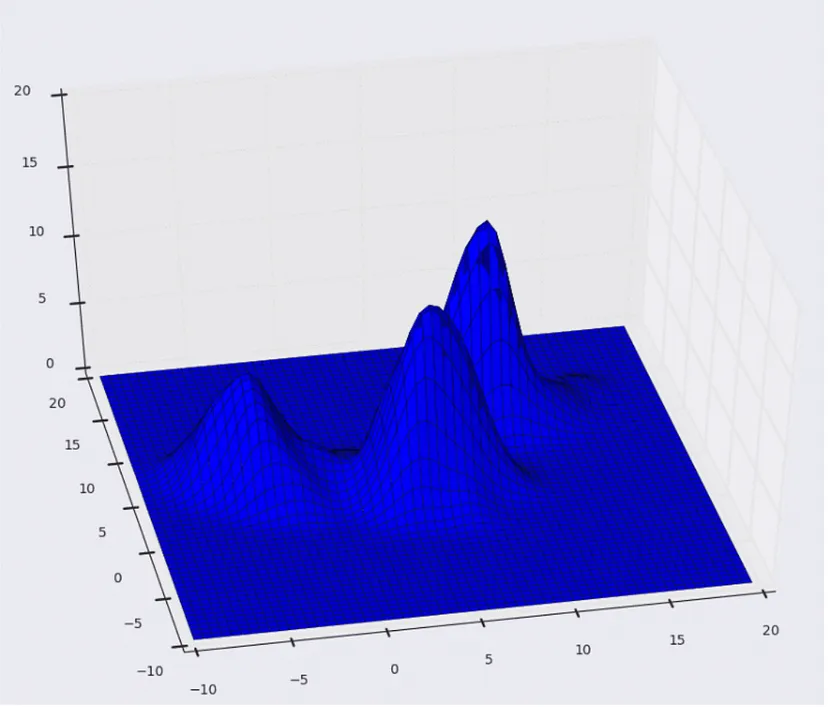

Passos:

* Inicialização
* Cálculo da janela de pesquisa (kernel)
* Cálculo do Mean Shift
* Atualização da posição
* Repete 2-4.
* Atribuição de clusters.

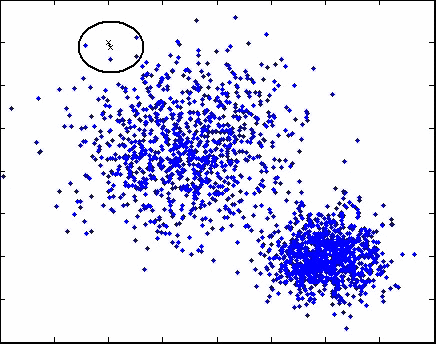




## 3.4.2 Optics (Ordering Points to Identify the Clustering Structure / Ordenando pontos para identificar a estrutura de clustering)
<p align="justify"> O Optics é um algoritmo para encontrar clusters baseado em densidade em dados espaciais. A ideia básica é semelhante ao DBSCAN, que será abordado posteriormente.</p>

<p align="justify">
Os pontos do banco de dados são ordenados linearmente, de forma que, os pontos mais próximos se tornam vizinhos na ordenação. Uma distância é armazenada para cada ponto, representando a densidade que deve ser aceita para um cluster para que ambos os pontos pertençam a um mesmo cluster.</p>





---
# 4. Dataset Classificação de Países


*   https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data?select=Country-data.csv


* Este dataset contém informações sobre 166 países, informações como: Renda, PIB, Taxa de Mortalidade Infantil, Investimento na Saúde.

* Dados utilizados para classificação dos paises: Renda (income), PIB (gdpp), Investimento voltado a saude (Health), Expectativa de Vida (life_expec)

* Problema: Destinação correta dos recursos arrecados pela HELP International (Observar sessão 4.2)


---
# 4.1 **Algoritmo DBSCAN**
<div style="text-align: justify;">

*   Density-Based Spatial Clustering of Applications with Noise
*   Gera agrupamentos (clusters).
*   Densidade Espacial

## Parâmetros Principais:
* Eps (Épsilon): Define o raio de vizinhança ao redor de cada ponto. Pontos dentro desse raio são considerados vizinhos.
* MinPts (Número Mínimo de Pontos): Define o número mínimo de pontos que devem existir dentro do raio Eps para que um ponto seja considerado um “core point”.
  * Tipos de Pontos no DBSCAN:
  * Core Points: São pontos com pelo menos MinPts vizinhos dentro do raio Eps. Eles formam o núcleo dos clusters.
  * Border Points: São pontos que não têm MinPts vizinhos dentro do raio Eps, mas estão dentro do raio de algum Core Point. Eles fazem parte do cluster, mas não são centrais.
  * Outliers: São pontos que não são Core Points nem Border Points. Eles estão isolados e não pertencem a nenhum cluster.

## Funcionamento do Algoritmo:
* Começa selecionando um ponto aleatório. Se esse ponto tiver pelo menos MinPts vizinhos dentro do raio Eps, ele é um Core Point. Todos os pontos conectados a esse Core Point (dentro do raio Eps) formam um cluster.
* Repete o processo para outros pontos até que todos os pontos sejam atribuídos a um cluster ou marcados como outliers.

## Problemas de Clustering Nesta Implementação:##

* Parâmetros Inadequados:
A escolha adequada de Eps e MinPts é crucial. Se esses valores forem definidos incorretamente, o DBSCAN pode não encontrar clusters significativos.
Nesta implementação, os valores padrão do Sklearn DBSCAN foram usados, resultando em um único cluster sem pontos de ruído. Isso pode não ser ideal para todos os conjuntos de dados.

* Clusters Pequenos e Tocantes:
O DBSCAN pode produzir clusters menores que MinPts se eles se tocarem.
Isso pode levar a pontos “roubados” entre clusters vizinhos, afetando a qualidade dos resultados.
</div>

---
# 4.2 **Desafio**

A HELP International conseguiu arrecadar cerca de US$ 10 milhões. Agora o CEO da ONG precisa de decidir como usar este dinheiro de forma estratégica e eficaz. Assim, o CEO tem de tomar a decisão de escolher os países que mais necessitam de ajuda. Portanto, seu trabalho como cientista de dados é categorizar os países usando alguns fatores socioeconômicos e de saúde que determinam o desenvolvimento geral do país. Então você precisa sugerir os países nos quais o CEO precisa se concentrar mais.


---
## Importação das bibliotecas

In [ ]:
import pandas as pd #biblioteca para tratamento dos dados
import numpy as np #biblioteca para operações matemáticas e manipuação de arrays
from sklearn.cluster import DBSCAN #biblioteca para execução do DBSCAN
from sklearn.preprocessing import StandardScaler #biblioteca par normalização dos dados
import matplotlib.pyplot as plt #biblioteca para plotagem de gráfico
import seaborn as sns #biblioteca para visualização de dados
from sklearn.preprocessing import MinMaxScaler #biblioteca para normalização dos dados
import numpy as np
from sklearn.metrics import silhouette_score

## Leitura do Banco de Dados

In [ ]:
# Carregando os dados

data = pd.read_csv("/content/Country-data.csv")

# Exibir as primeiras linhas do DataFrame
print(data.to_string(index=False))

#Arquivo baixado do URL: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data?select=Country-data.csv

                       country  child_mort  exports  health  imports  income  inflation  life_expec  total_fer   gdpp
                   Afghanistan        90.2   10.000    7.58  44.9000    1610      9.440        56.2       5.82    553
                       Albania        16.6   28.000    6.55  48.6000    9930      4.490        76.3       1.65   4090
                       Algeria        27.3   38.400    4.17  31.4000   12900     16.100        76.5       2.89   4460
                        Angola       119.0   62.300    2.85  42.9000    5900     22.400        60.1       6.16   3530
           Antigua and Barbuda        10.3   45.500    6.03  58.9000   19100      1.440        76.8       2.13  12200
                     Argentina        14.5   18.900    8.10  16.0000   18700     20.900        75.8       2.37  10300
                       Armenia        18.1   20.800    4.40  45.3000    6700      7.770        73.3       1.69   3220
                     Australia         4.8   19.800    8

## Selecionar e normalizar os Dados

In [ ]:
# Selecionando as colunas relevantes para a Análise
X = data[['income', 'life_expec', 'gdpp', 'health', 'country']]

# Normalizando os Dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

KeyError: "['country'] not in index"

## Modelo DBSCAN

In [ ]:
# Criando o modelo DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=4) #eps = raio para formação do cluster (eps grande -> cluster denso)
                                        #min_samples = conjunto mínimo de pontos para formar um cluster
Cluster = dbscan.fit_predict(X_scaled)
# Adicionando os rótulos de Clusters
data['Cluster'] = dbscan.labels_

# Classificação dos países com base nas etiquetas dos clusters
def classify(row):
    income_normalized = row['income']
    gdpp_normalized = row['gdpp']
    health_normalized = row['health']
    life_expec = row['life_expec']

    classification_index = (income_normalized + health_normalized + gdpp_normalized + life_expec) / 4

    if classification_index > 0.5:
        return 'Desenvolvidos'
    elif -0.9 < classification_index <= 0.5:
        return 'Em Desenvolvimento'
    else:
        return 'Subdesenvolvidos'

data[['income', 'life_expec', 'gdpp', 'health']] = X_scaled
data['classificacao'] = data.apply(classify, axis=1)

## Países mais necessitados:

In [ ]:
# Seleciona os países classificados como 'Subdesenvolvidos'
neediest_countries = data[data['classificacao'] == 'Subdesenvolvidos']

# Obtém a lista de países
#countries_list = neediest_countries['country'].tolist()

# Imprime os países com a formatação desejada
print("Países mais necessitados:")
for i, country in enumerate(countries_list, start=1):
    print(f"{i} {country}")

Países mais necessitados:
1 Afghanistan
2 Burkina Faso
3 Burundi
4 Cameroon
5 Central African Republic
6 Chad
7 Congo, Dem. Rep.
8 Cote d'Ivoire
9 Guinea
10 Guinea-Bissau
11 Haiti
12 Kiribati
13 Lesotho
14 Liberia
15 Madagascar
16 Malawi
17 Mali
18 Mozambique
19 Niger
20 Sierra Leone
21 South Africa
22 Tanzania
23 Togo
24 Uganda
25 Zambia


## Plotagem dos gráficos

KeyError: 'country'

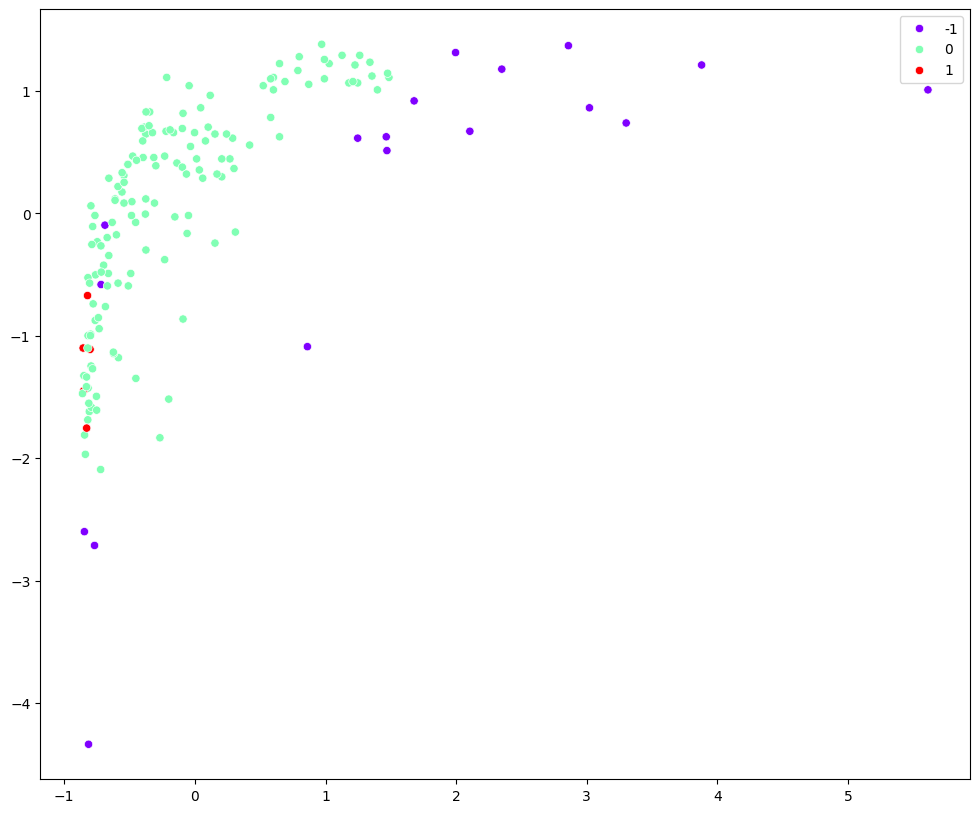

In [ ]:
# Visualizando os clusters
plt.figure(figsize=(12, 10))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=Cluster, palette='rainbow', legend='full')

# Adicionando anotações aos pontos
for i, txt in enumerate(data['country']):
   plt.annotate(txt, (X_scaled[i, 0], X_scaled[i, 1]), fontsize=8)

# Definindo os rótulos dos eixos e o título
plt.xlabel("Renda")
plt.ylabel("Expectativa de Vida")
plt.title("Clusters usando DBSCAN")
plt.legend()

# Destacando os países mais necessitados
plt.scatter(neediest_countries['income'], neediest_countries['life_expec'], color='black', label='Países mais necessitados')

# Mostrando o pairplot dos outros parâmetros
plt.figure(figsize=(21, 21))
sns.pairplot(data, vars=['income', 'gdpp', 'health', 'life_expec'], hue='Cluster', palette='rainbow')

plt.show()

---
# **4.3 Resultados**
<div style="text-align: justify;">
Grande parte dos países foram devidamente classificados, com base nos dados extraídos e normalizados. Com isso, espera-se que o dinheiro arrecadado seja destinado aos países mais necessitados. Entretanto, podemos observar alguns desafios para o desempenho ótimo do algoritmo, como:

* Dimensionalidade dos dados
  * Multiplas Variáveis consideradas
* Contexto Econômico e Social
  * No algoritmo, foram consideradas apenas variáveis quantitativas, uma pesquisa, ou algo qualitativo poderia ser utilizado.
</div>

---
# 4.4 **Outros algoritmos de clustering que poderiam ser utilizados**

## **4.4.1 K-Means:**
O K-Means é um dos algoritmos de clustering mais populares e amplamente utilizado. Ele divide os dados em K clusters, onde K é um número pré-definido.
O algoritmo funciona encontrando centróides para cada cluster e atribuindo pontos ao centróide mais próximo. No entanto, o K-Means requer que o número de clusters seja especificado antecipadamente, o que pode ser uma desvantagem em alguns casos.


Vantagens: Simplicidade, eficiência em grandes datasets.

Desvantagens: Requer a definição prévia do número de clusters, sensível a outliers e inicialização.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


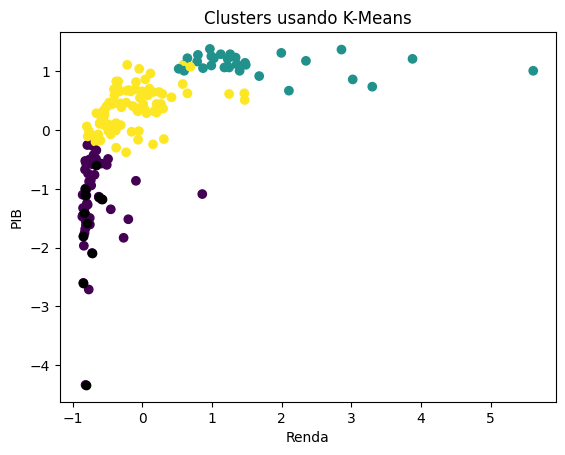

In [ ]:
from sklearn.cluster import KMeans
k = 3  # Definindo o número de clusters
kmeans = KMeans(n_clusters=k, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)
data['Cluster_KMeans'] = clusters_kmeans
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_kmeans, cmap='viridis')
plt.scatter(neediest_countries['income'], neediest_countries['life_expec'], color='black', label='Países mais necessitados')
plt.xlabel("Renda")
plt.ylabel("PIB")
plt.title("Clusters usando K-Means")
plt.show()

## **4.4.2 Clusterização Hierárquica:**
A Clusterização Hierárquica cria uma árvore de clusters, também conhecida como dendrograma. Diferente do K-means, ela não requer a definição prévia do número de clusters.
Existem dois tipos principais de Clusterização Hierárquica:
* Aglomerativa/Bottom-up (começa com cada ponto como um cluster individual e mescla clusters sucessivamente)
* Divisiva/Top-down (começa com todos os pontos em um único cluster e divide-os em subgrupos). A visualização do dendrograma ajuda a entender as relações entre os clusters.


![Clusterização Hierárquica Aglomerativa e Divisiva](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSAobUci-g8SV3-LmIGvLMu7VuVuT9DcKT8ww&usqp=CAU)


**Métodos de Linkage: medir a dissimilaridade entre clusters durante a clusterização.**
* Ward: Minimiza a variância total dentro dos clusters ao escolher combinações que resultam na menor adição de variância. Tende a formar clusters compactos e bem definidos, adequados para dados numéricos.


* Complete: Calcula a distância entre clusters como a maior distância entre os pontos de clusters diferentes. Tende a formar clusters compactos e bem definidos.


* Average: Calcula a distância entre clusters como a média das distâncias entre todos os pares de pontos nos clusters. Oferece um equilíbrio entre os métodos single e complete.


* Simple: Calcula a distância entre clusters como a menor distância entre os pontos de clusters diferentes. Pode resultar em clusters esticados ou alongados.


* Centroides: Calcula a distância entre os centroides dos clusters.



Vantagens: Não requer a especificação prévia do número de clusters, fornece uma representação visual da hierarquia dos clusters.

Desvantagens: Computacionalmente intensivo em grandes datasets, sensível a outliers e ruído.
</div>

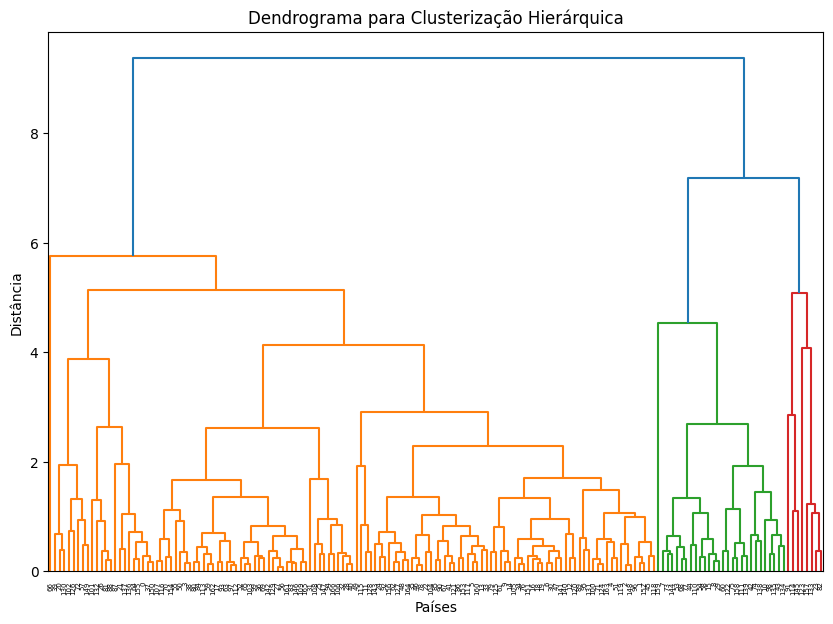

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
Z = linkage(X_scaled, method='complete')
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Dendrograma para Clusterização Hierárquica")
plt.xlabel("Países")
plt.ylabel("Distância")
plt.show()



---
# 5 Referências


* Data Mining na Prática: Algoritmo K-Means. DEVMedia, 2007. Disponível em:
https://www.devmedia.com.br/data-mining-na-pratica-algoritmo-k-means/4584
* SCIKIT-LEARN. DBSCAN clustering. Disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html.
* DADOS AO CUBO. Descubra como utilizar o DBSCAN em Python para análise de dados. Disponível em: https://dadosaocubo.com/descubra-como-utilizar-o-dbscan-em-python-para-analise-de-dados/.